In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Read the contributors_to_GBREB.csv file and GBREB_to_Coun.csv file
# Reading only Date, Contributor, Zip, Amount, Recipient, Record Type Description, and Source Description columns
contributors = pd.read_csv("/Users/ahnbh/Spark! file/Lobbist project/contributors_to_GBREB.csv", usecols=["Date", "Contributor", "Zip", "Amount", "Recipient", "Record Type Description", "Source Description"])
contributions = pd.read_csv("C:/Users/ahnbh/Spark! file/Lobbist project/GBREB_to_Coun.csv", usecols=["Date", "Contributor", "Zip", "Amount", "Recipient", "Record Type Description", "Source Description"])

In [3]:
# Print the contributors file
contributors.head()

,Date,Contributor,Zip,Amount,Recipient,Record Type Description,Source Description
0,1/6/2004,"Druker, Ron",2108.0,$500.00,Greater Boston Real Estate Board PAC,Individual,2004 Pre-primary Report (PAC)
1,1/6/2004,"Spurr, John",2066.0,$500.00,Greater Boston Real Estate Board PAC,Individual,2004 Pre-primary Report (PAC)
2,12/21/2004,"Barkan, Mel A",2116.0,$500.00,Greater Boston Real Estate Board PAC,Individual,2004 Year-end Report (PAC)
3,12/21/2004,"Boyajian, Sonia V",2472.0,$300.00,Greater Boston Real Estate Board PAC,Individual,2004 Year-end Report (PAC)
4,12/21/2004,"Coppola, John A",2445.0,$300.00,Greater Boston Real Estate Board PAC,Individual,2004 Year-end Report (PAC)


In [4]:
# Print the recipients file
contributions.head()

,Date,Contributor,Zip,Amount,Recipient,Record Type Description,Source Description
0,3/28/2001,Greater Boston Real Estate Board PAC,2108,$125.00,"Berry, Frederick E.",Committee,2001 Year-end Report (ND)
1,4/9/2001,Greater Boston Real Estate Board PAC,2108,$100.00,"Kafka, Louis L.",Committee,2001 Year-end Report (ND)
2,4/10/2001,GREATER BOSTON REAL ESTATE BOARD,2108,$100.00,"Bosley, Daniel E.",Committee,2001 Year-end Report (ND)
3,4/30/2001,Greater Boston Real Estate Board PAC,2108,$100.00,"Quinn, John F.",Committee,2001 Year-end Report (ND)
4,12/1/2001,Greater Boston Real Estate Board PAC,2108,$100.00,"Jones Jr., Bradley H.",Committee,2001 Year-end Report (ND)


In [5]:
# Export csv files above to new csv files
contributors_filepath = Path('/Users/ahnbh/Spark! file/Lobbist project/contributors_to_GBREB_organized.csv')
contributions_filepath = Path('/Users/ahnbh/Spark! file/Lobbist project/GBREB_to_Coun_organized.csv')
contributors.to_csv(contributors_filepath)
contributions.to_csv(contributions_filepath)

In [6]:
# For plotting the data only take Date and Amount columns
contributors = pd.read_csv("/Users/ahnbh/Spark! file/Lobbist project/contributors_to_GBREB.csv", usecols=["Date","Amount"])
contributions = pd.read_csv("C:/Users/ahnbh/Spark! file/Lobbist project/GBREB_to_Coun.csv", usecols=["Date","Amount"])

In [7]:
contributors.head()

,Date,Amount
0,1/6/2004,$500.00
1,1/6/2004,$500.00
2,12/21/2004,$500.00
3,12/21/2004,$300.00
4,12/21/2004,$300.00


In [8]:
contributions.head()

,Date,Amount
0,3/28/2001,$125.00
1,4/9/2001,$100.00
2,4/10/2001,$100.00
3,4/30/2001,$100.00
4,12/1/2001,$100.00


In [9]:
# Parsing only the value of the Amount for contributors data
print(float(contributors["Amount"][0].split("$")[1]))

500.0


In [10]:
# Parsing only the year of the Date for contributors data
print(contributors["Date"][0].split("/")[0])

1


In [11]:
# Sorting Amount according to each year since 2005
contributors_annual_sum = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0]
contributors_years = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

for i in range(len(contributors)):
    for j in range(len(contributors_years)):
        if (contributors["Date"][i].split("/")[2] == str(contributors_years[j])):
            amount = contributors["Amount"][i].split("$")[1]
            if(amount.count(",") > 0):
                amount = amount.split(",")[0] + amount.split(",")[1]
            contributors_annual_sum[j] = contributors_annual_sum[j] + float(amount)

print(contributors_annual_sum)

check = 0.0
for i in contributors_annual_sum:
    check += i
print(check)

[11309.81, 15124.01, 15441.0, 13905.0, 14915.0, 17301.0, 21725.0, 23120.0, 22215.0, 22075.0, 26546.2, 24045.0, 19900.0, 24578.99, 19535.0, 17825.0, 22275.0, 23500.0]
355336.01


In [12]:
# Parsing only the month and year of the contribution data
print(contributions["Date"][0].split("/")[0]+"/"+contributions["Date"][0].split("/")[2])

3/2001


In [13]:
# Parsing only amount of contribution data
print(contributions["Amount"][0].split("$")[1])

125.00 


In [14]:
# # For displaying subamounts in correct format of dollors
annual_amountLabel = ["", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", ""]

for i in range(len(contributors_annual_sum)):
    annual_amountLabel[i] = str(contributors_annual_sum[i]).split(".")[0]
    if len(annual_amountLabel[i]) > 3:
        annual_amountLabel[i] = "$" + annual_amountLabel[i][:-3]+","+annual_amountLabel[i][-3:]

print(annual_amountLabel)

['$11,309', '$15,124', '$15,441', '$13,905', '$14,915', '$17,301', '$21,725', '$23,120', '$22,215', '$22,075', '$26,546', '$24,045', '$19,900', '$24,578', '$19,535', '$17,825', '$22,275', '$23,500']


In [15]:
# Sorting Amount according to each quater from 2019
contributions_years = [2019, 2020, 2021, 2022]
contributions_q1 = [1, 2, 3]
contributions_q2 = [4, 5, 6]
contributions_q3 = [7, 8, 9]
contributions_q4 = [10, 11, 12]
contributions_qSum = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ,0.0 ,0.0 ,0.0, 0.0]
contributions_quaters = ["2019_Q1", "2019_Q2", "2019_Q3", "2019_Q4", "2020_Q1", "2020_Q2", "2020_Q3", "2020_Q4", "2021_Q1", "2021_Q2", "2021_Q3", "2021_Q4", "2022_Q1", "2022_Q2", "2022_Q3", "2022_Q4"]

for i in range(len(contributions)):
    for y in range(len(contributions_years)):
        if (contributions["Date"][i].split("/")[2] == str(contributions_years[y])):
            if (contributions["Date"][i].split("/")[2] == "2019"):
                index = 0
            elif (contributions["Date"][i].split("/")[2] == "2020"):
                index = 4
            elif (contributions["Date"][i].split("/")[2] == "2021"):
                index = 8
            elif (contributions["Date"][i].split("/")[2] == "2022"):
                index = 12
            for m in range(len(contributions_q1)):
                amount = contributions["Amount"][i].split("$")[1]
                if(amount.count(",") > 0):
                    amount = amount.split(",")[0] + amount.split(",")[1]
                    
                if (contributions["Date"][i].split("/")[0] == str(contributions_q1[m])):
                    contributions_qSum[index] = contributions_qSum[index] + float(amount)
                elif (contributions["Date"][i].split("/")[0] == str(contributions_q2[m])):
                    contributions_qSum[index+1] = contributions_qSum[index+1] + float(amount)
                elif (contributions["Date"][i].split("/")[0] == str(contributions_q3[m])):
                    contributions_qSum[index+2] = contributions_qSum[index+2] + float(amount)
                elif (contributions["Date"][i].split("/")[0] == str(contributions_q4[m])):
                    contributions_qSum[index+3] = contributions_qSum[index+3] + float(amount)

print(contributions_qSum)
check_annual = 0
for i in contributions_qSum:
    check_annual += i
print(check_annual)

[5400.0, 8900.0, 3000.0, 1200.0, 4000.0, 1650.0, 1100.0, 4350.0, 1550.0, 3800.0, 2650.0, 9000.0, 2400.0, 6550.0, 6200.0, 2500.0]
64250.0


In [16]:
# For displaying subamounts in correct format of dollors
qSum_amountLabel = ["", "", "", "", "", "", "", "", "", "", "", "", "", "", "", ""]

for i in range(len(contributions_qSum)):
    qSum_amountLabel[i] = str(contributions_qSum[i]).split(".")[0]
    if len(qSum_amountLabel[i]) > 3:
        qSum_amountLabel[i] = "$" + qSum_amountLabel[i][:-3]+","+qSum_amountLabel[i][-3:]

print(qSum_amountLabel)

annualSub = str(check_annual).split(".")[0]
annualSub = "$" + annualSub[:-3]+","+annualSub[-3:]
print(annualSub)
checked = "$"+str(check)[:-6]+","+str(check)[-6:-3]
print(checked)

['$5,400', '$8,900', '$3,000', '$1,200', '$4,000', '$1,650', '$1,100', '$4,350', '$1,550', '$3,800', '$2,650', '$9,000', '$2,400', '$6,550', '$6,200', '$2,500']
$64,250
$355,336


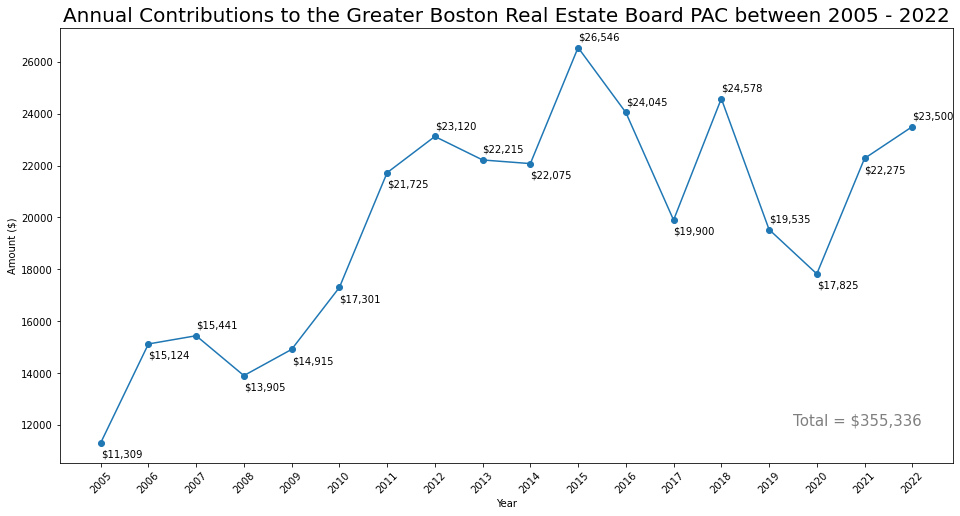

In [17]:
up_y = [2,7,8,10,11,13,14,17]
down_y = [0,1,3,4,5,6,9,12,15,16]
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(contributors_years, contributors_annual_sum, marker='o')
plt.xlabel('Year')
plt.ylabel("Amount ($)")
plt.title("Annual Contributions to the Greater Boston Real Estate Board PAC between 2005 - 2022", fontsize = 20)
plt.xticks(contributors_years, rotation=45)
for index in up_y:
  ax.text(contributors_years[index], contributors_annual_sum[index]+300, annual_amountLabel[index], size=10)
for index in down_y:
  ax.text(contributors_years[index], contributors_annual_sum[index]-550, annual_amountLabel[index], size=10)

plt.text(2019.5, 12000, "Total = "+checked, fontsize=15, alpha=0.5)
plt.savefig("/Users/ahnbh/Spark! file/Lobbist project/annual plot.jpg", format='jpg')

plt.show()

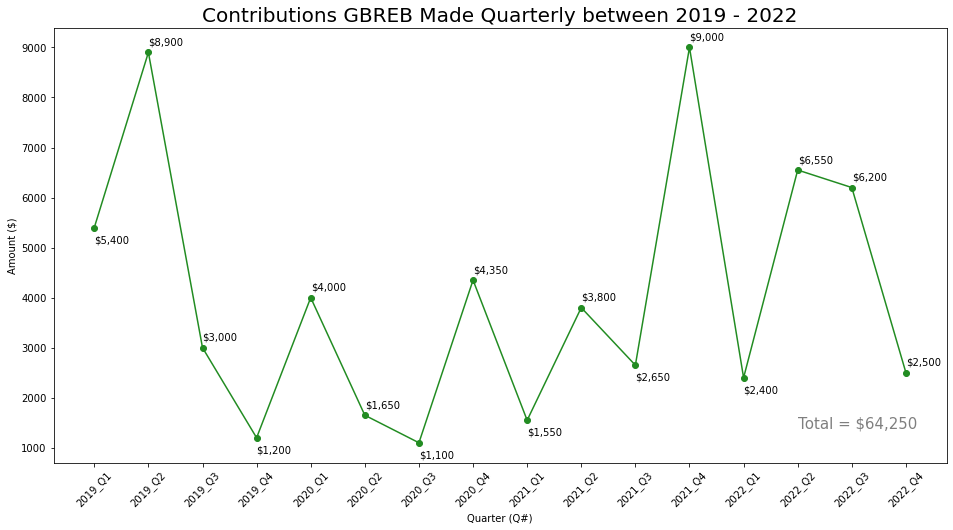

In [18]:
up = [1,2,4,5,7,9,11,13,14,15]
down = [0,3,6,8,10,12]
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(contributions_quaters, contributions_qSum, marker='o', color='#228C22')
plt.xlabel('Quarter (Q#)')
plt.ylabel("Amount ($)")
plt.title("Contributions GBREB Made Quarterly between 2019 - 2022", fontsize = 20)
plt.xticks(contributions_quaters, rotation=45)
for index in up:
    ax.text(contributions_quaters[index], contributions_qSum[index]+150, qSum_amountLabel[index], size=10)
for index in down:
    ax.text(contributions_quaters[index], contributions_qSum[index]-300, qSum_amountLabel[index], size=10)

plt.text(13, 1400, "Total = "+annualSub, fontsize=15, alpha=0.5)
plt.savefig("/Users/ahnbh/Spark! file/Lobbist project/quarter plot.jpg", format='jpg')    
plt.show()

In [19]:
# Read the GBREB_to_Coun.csv file for city data
to_city = pd.read_csv("C:/Users/ahnbh/Spark! file/Lobbist project/GBREB_to_Coun.csv", usecols = ["Date", "Amount", "Recipient"])
# Print the recipients file
to_city.head()

,Date,Amount,Recipient
0,3/28/2001,$125.00,"Berry, Frederick E."
1,4/9/2001,$100.00,"Kafka, Louis L."
2,4/10/2001,$100.00,"Bosley, Daniel E."
3,4/30/2001,$100.00,"Quinn, John F."
4,12/1/2001,$100.00,"Jones Jr., Bradley H."


In [20]:
# Read the GBREB_to_Coun.csv file for state data
to_state = pd.read_csv("C:/Users/ahnbh/Spark! file/Lobbist project/GBREB_to_Coun.csv", usecols = ["Date", "Amount", "Recipient"])
to_state.head()

,Date,Amount,Recipient
0,3/28/2001,$125.00,"Berry, Frederick E."
1,4/9/2001,$100.00,"Kafka, Louis L."
2,4/10/2001,$100.00,"Bosley, Daniel E."
3,4/30/2001,$100.00,"Quinn, John F."
4,12/1/2001,$100.00,"Jones Jr., Bradley H."


In [21]:
# List of City Council & Mayor
# city = {"Healey, Maura T.":0, "Yoon, Sam":0, !"Arroyo, Recardo":0, !"Flaherty Jr., Michael F.":0
#         , "Connolly, John R.":0, "Wu, Michelle":0, !"Louijeune, Ruthzee":0, "Murphy, Stephen":0, "Murphy, Stephen J.":0
#         , "George, Annissa":0, "Essaibi George, Annissa":0, !"Mejia, Julia":0, "Roache, Francis":0, "Pressley, Ayanna ":0
#         , "LaMattina, Salvatore":0, "Edwards, Lydia":0, "Linehan, William 'Bill'":0, "Flynn, Edward Michael":0, "Feeney, Maureen":0
#        , !"Baker, Frank":0, "Campbell, Andrea Joy":0, !"Worrell, Brian":0, "Consalvo, Rob":0, "McCarthy, Timothy Patrick":0
#         , "O'Malley, Matthew J.":0, "Jackson, Tito":0, "Zakim, Joshua":0, !"Bok, Priscilla MacKenzie":0, "Ciommo, Mark":0
#         , !"Breadon, Elizabeth A.":0, !"Murphy, Erin":0, "Coletta, Gabriela":0, "Lara, Kendra":0, "Anderson, Tania Fernandes":0
#        , "Flynn, Ed.":0}

city = {"Arroyo, Recardo":0, "Flaherty Jr., Michael F.":0, "Louijeune, Ruthzee":0, "Mejia, Julia":0, "Baker, Frank":0, "Worrell, Brian":0, 
       "Bok, Priscilla MacKenzie":0, "Breadon, Elizabeth A.":0, "Murphy, Erin":0, "Coletta, Gabriela":0, "Lara, Kendra":0, 
       "Anderson, Tania Fernandes":0, "Flynn, Ed.":0, "Wu, Michelle":0}

print(len(city))

14


In [22]:
# Sorting Amount according to each Mayor & City officials since 2021
city_years = [2021, 2022, 2023]

for i in range(len(to_city)):
    for year in range(len(city_years)):
        if (to_city["Date"][i].split("/")[2] == str(city_years[year])):
            amount = to_city["Amount"][i].split("$")[1]
#             if (amount.count(",") > 0):
#                 amount = amount.split(",")[0] + amount.split(",")[1]
            for name in list(city.keys()):
                if (to_city["Recipient"][i] == name):
                    city[name] = city[name] + float(amount)

sortedCity = sorted(city.items(), key = lambda x:x[1], reverse=True)
city = dict(sortedCity)
print(city)

{'Baker, Frank': 500.0, 'Wu, Michelle': 500.0, 'Worrell, Brian': 250.0, 'Bok, Priscilla MacKenzie': 250.0, 'Breadon, Elizabeth A.': 250.0, 'Arroyo, Recardo': 0, 'Flaherty Jr., Michael F.': 0, 'Louijeune, Ruthzee': 0, 'Mejia, Julia': 0, 'Murphy, Erin': 0, 'Coletta, Gabriela': 0, 'Lara, Kendra': 0, 'Anderson, Tania Fernandes': 0, 'Flynn, Ed.': 0}


In [23]:
city_x = list(city.keys())
for i in range(len(city_x)):
    if (city_x[i] == "Anderson, Tania Fernandes"):
        city_x[i] = "Anderson, Tania F."
print(city_x)

city_y = list(city.values())
print(city_y)

['Baker, Frank', 'Wu, Michelle', 'Worrell, Brian', 'Bok, Priscilla MacKenzie', 'Breadon, Elizabeth A.', 'Arroyo, Recardo', 'Flaherty Jr., Michael F.', 'Louijeune, Ruthzee', 'Mejia, Julia', 'Murphy, Erin', 'Coletta, Gabriela', 'Lara, Kendra', 'Anderson, Tania F.', 'Flynn, Ed.']
[500.0, 500.0, 250.0, 250.0, 250.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


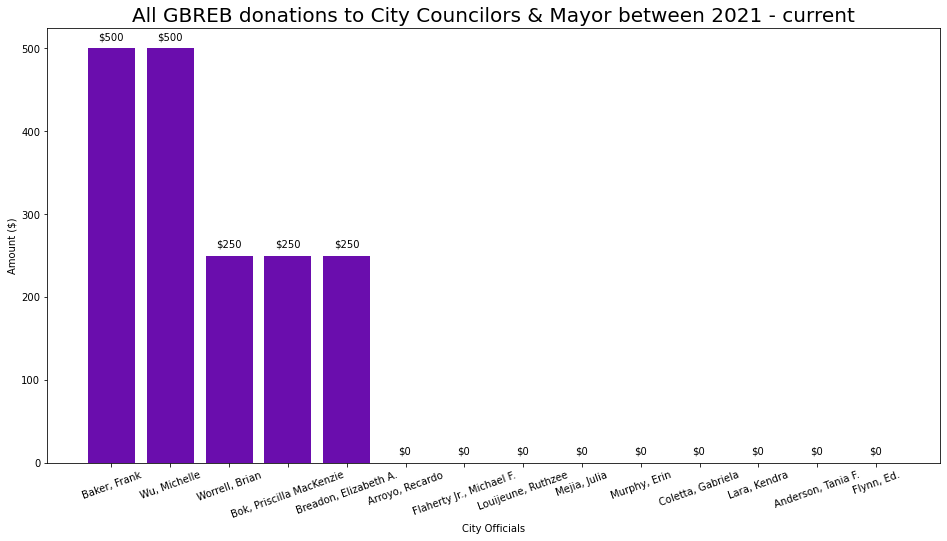

In [24]:
city_label = ["","","","","","","","","","","","","",""]
for i in range(len(city_label)):
    city_label[i] = "$"+str(city_y[i]).split(".")[0]

city_v = [0,1,2,3,4]
city_0 = [5,6,7,8,9,10,11,12,13]
city_color = ["#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD"]

fig, ax = plt.subplots(figsize=(16,8))
plt.bar(city_x, city_y,width = 0.8, color=city_color)
plt.xticks(city_x, rotation=20)
plt.xlabel('City Officials')
plt.ylabel("Amount ($)")
plt.title("All GBREB donations to City Councilors & Mayor between 2021 - current", fontsize=20)

for index in city_v:
    ax.text(index-0.22, city_y[index]+10, city_label[index], size=10)
for index in city_0:
    ax.text(index-0.12, city_y[index]+10, city_label[index], size=10)
    
plt.savefig("/Users/ahnbh/Spark! file/Lobbist project/city_officials.jpg", format='jpg')  
plt.show()

In [25]:
# List of state officials

houseMem = {"Arciero, Jim": 0, "Ayers, Bruce J." :0, "Barber, Christine P.": 0, "Biele, David M.": 0, "Cabral, Antonio F. D.": 0,
           "Cahill, Daniel F.": 0, "Chan, Tackey": 0, "Consalvo, Rob": 0, "Cusack, Mark James": 0, "Cutler, Josh": 0, "Day, Michael S.": 0,
           "Decker, Marjorie C.": 0, "Donahue, Daniel M.": 0, "Donato, Paul J.": 0, "Driscoll, William J.": 0, "Ferrante, Ann-Margaret": 0,
           "Finn, Michael J.": 0, "Fluker Oakley, Brandy": 0, "Galvin, William C.": 0, "Garlick, Denise": 0, "Giannino, Jessica": 0,
           "Gonzalez, Carlos": 0, "Gordon, Kenneth I.": 0, "Gregoire, Danielle W.": 0, "Haddad, Patricia A.": 0, "Haggerty, Richard M.": 0,
           "Hogan, Kate": 0, "Holmes, Russell": 0, "Honan, Kevin G.": 0, "Hunt, Daniel J.": 0, "Jones Jr., Bradley H.": 0, "Kilcoyne, Meghan": 0,
           "Lawn, John": 0, "LeBoeuf, David Henry Argosky": 0, "Livingstone, Jay": 0, "Madaro, Adrian": 0, "Mahoney, John J.":0, "Mariano, Ronald": 0,
           "McGonagle, Joseph W.": 0, "McMurtry, Paul": 0, "Meschino, Joan": 0, "Michlewitz, Aaron": 0, "Mom, Rady": 0, "Moran, Michael J.": 0,
           "Murphy, James": 0, "Nguyen, Tram": 0, "O'Day, James J.": 0, "Parisella, Jerald A.": 0, "Peake, Sarah": 0, "Philips, Edward Ryan": 0,
           "Rogers, David M.": 0, "Rogers, John H.": 0, "Roy, Jeffrey N.": 0, "Ryan, Daniel Joseph": 0, "Stanley, Thomas M.":0,
           "Straus, William M.": 0, "Tyler, Chynah": 0, "Ultrino, Steven": 0, "Vitolo, Thomas J.": 0}

senate = {"Brady, Michael D.": 0, "Collins, Nicholas P.": 0, "Creem, Cynthia S.": 0, "Crighton, Brendan Peter": 0, "Cronin, John": 0,
         "Cyr, Julian Andre": 0, "DiDomenico, Sal N.": 0, "Edwards, Lydia": 0, "Feeney, Paul": 0, "Finegold, Barry R.": 0, "Gobi, Anne M.": 0,
         "Keenan, John F.": 0, "Lewis, Jason": 0, "Montigny, Mark C.W.": 0, "Moore, Michael": 0, "Moran, Susan": 0, "O'Connor, Patrick": 0,
         "Pacheco, Marc R.": 0, "Rodrigues, Michael J.": 0, "Rush, Michael F.": 0, "Spilka, Karen": 0, "Tarr, Bruce": 0, "Timilty, Walter F.": 0,
         "Velis, John Christopher": 0}

#Mariano, Ronald has -300 in syntex of (#300). Check if it causes error
House_T = pd.read_csv("C:/Users/ahnbh/Spark! file/Lobbist project/GBREB_to_Coun.csv", usecols=["Date","Amount"])
Senate_T = pd.read_csv("C:/Users/ahnbh/Spark! file/Lobbist project/GBREB_to_Coun.csv", usecols=["Date","Amount"])

In [26]:
state_years = [2022, 2023]

# Calculating subtotal for House Members
for i in range(len(to_state)):
    for year in range(len(state_years)):
        if (to_state["Date"][i].split("/")[2] == str(state_years[year])):
            amount = to_state["Amount"][i].split("$")[1]
            if (amount.count("-") > 0):
                amount = amount.split("-")[1]
            if (amount.count(",") > 0):
                amount = amount.split(",")[0] + amount.split(",")[1]
            for name in list(houseMem.keys()):
                if (to_state["Recipient"][i] == name):
                    houseMem[name] = houseMem[name] + float(amount)

sortedHM = sorted(houseMem.items(), key = lambda x:x[1], reverse=True)
houseMem = dict(sortedHM)
print(houseMem)

{'Mariano, Ronald': 500.0, 'Michlewitz, Aaron': 500.0, 'Arciero, Jim': 300.0, 'Cahill, Daniel F.': 300.0, 'Cutler, Josh': 300.0, 'Day, Michael S.': 300.0, 'Galvin, William C.': 300.0, 'Garlick, Denise': 300.0, 'Jones Jr., Bradley H.': 300.0, 'Lawn, John': 300.0, 'Moran, Michael J.': 300.0, 'Murphy, James': 300.0, 'Parisella, Jerald A.': 300.0, 'Roy, Jeffrey N.': 300.0, 'Stanley, Thomas M.': 300.0, 'Straus, William M.': 300.0, 'Donato, Paul J.': 250.0, 'Gordon, Kenneth I.': 250.0, 'Hogan, Kate': 250.0, 'Ryan, Daniel Joseph': 250.0, 'Ayers, Bruce J.': 200.0, 'Biele, David M.': 200.0, 'Cabral, Antonio F. D.': 200.0, 'Consalvo, Rob': 200.0, 'Driscoll, William J.': 200.0, 'Livingstone, Jay': 200.0, 'Meschino, Joan': 200.0, 'Peake, Sarah': 200.0, 'Rogers, John H.': 200.0, 'Tyler, Chynah': 200.0, 'Giannino, Jessica': 150.0, 'Philips, Edward Ryan': 150.0, 'Kilcoyne, Meghan': 100.0, 'Vitolo, Thomas J.': 100.0, 'Barber, Christine P.': 0, 'Chan, Tackey': 0, 'Cusack, Mark James': 0, 'Decker, Marjo

In [27]:
# Calculating subtotal for Senate
for i in range(len(to_state)):
    for year in range(len(state_years)):
        if (to_state["Date"][i].split("/")[2] == str(state_years[year])):
            amount = to_state["Amount"][i].split("$")[1]
            if (amount.count("-") > 0):
                amount = amount.split("-")[1]
            if (amount.count(",") > 0):
                amount = amount.split(",")[0] + amount.split(",")[1]
            for name in list(senate.keys()):
                if (to_state["Recipient"][i] == name):
                    senate[name] = senate[name] + float(amount)

sortedSe = sorted(senate.items(), key = lambda x:x[1])
senate = dict(sortedSe)
print(senate)

{'Creem, Cynthia S.': 0, 'Cyr, Julian Andre': 0, 'DiDomenico, Sal N.': 0, 'Feeney, Paul': 0, 'Gobi, Anne M.': 0, 'Lewis, Jason': 0, 'Montigny, Mark C.W.': 0, 'Pacheco, Marc R.': 0, 'Rush, Michael F.': 0, 'Brady, Michael D.': 200.0, 'Cronin, John': 200.0, 'Edwards, Lydia': 200.0, "O'Connor, Patrick": 200.0, 'Crighton, Brendan Peter': 300.0, 'Finegold, Barry R.': 300.0, 'Keenan, John F.': 300.0, 'Moore, Michael': 300.0, 'Moran, Susan': 300.0, 'Tarr, Bruce': 300.0, 'Timilty, Walter F.': 300.0, 'Rodrigues, Michael J.': 500.0, 'Spilka, Karen': 500.0, 'Velis, John Christopher': 500.0, 'Collins, Nicholas P.': 600.0}


In [28]:
# House memeber
print("House Member")
houseMem_x = list(houseMem.keys())[:20]
print(houseMem_x)

houseMem_y = list(houseMem.values())[:20]
print(houseMem_y)

print("")

# Senate
print("Senate Member")
senate_x = list(senate.keys())[-20:]
print(senate_x)

senate_y = list(senate.values())[-20:]
print(senate_y)

House Member
['Mariano, Ronald', 'Michlewitz, Aaron', 'Arciero, Jim', 'Cahill, Daniel F.', 'Cutler, Josh', 'Day, Michael S.', 'Galvin, William C.', 'Garlick, Denise', 'Jones Jr., Bradley H.', 'Lawn, John', 'Moran, Michael J.', 'Murphy, James', 'Parisella, Jerald A.', 'Roy, Jeffrey N.', 'Stanley, Thomas M.', 'Straus, William M.', 'Donato, Paul J.', 'Gordon, Kenneth I.', 'Hogan, Kate', 'Ryan, Daniel Joseph']
[500.0, 500.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 250.0, 250.0, 250.0, 250.0]

Senate Member
['Gobi, Anne M.', 'Lewis, Jason', 'Montigny, Mark C.W.', 'Pacheco, Marc R.', 'Rush, Michael F.', 'Brady, Michael D.', 'Cronin, John', 'Edwards, Lydia', "O'Connor, Patrick", 'Crighton, Brendan Peter', 'Finegold, Barry R.', 'Keenan, John F.', 'Moore, Michael', 'Moran, Susan', 'Tarr, Bruce', 'Timilty, Walter F.', 'Rodrigues, Michael J.', 'Spilka, Karen', 'Velis, John Christopher', 'Collins, Nicholas P.']
[0, 0, 0, 0, 0, 200.0, 200.0,

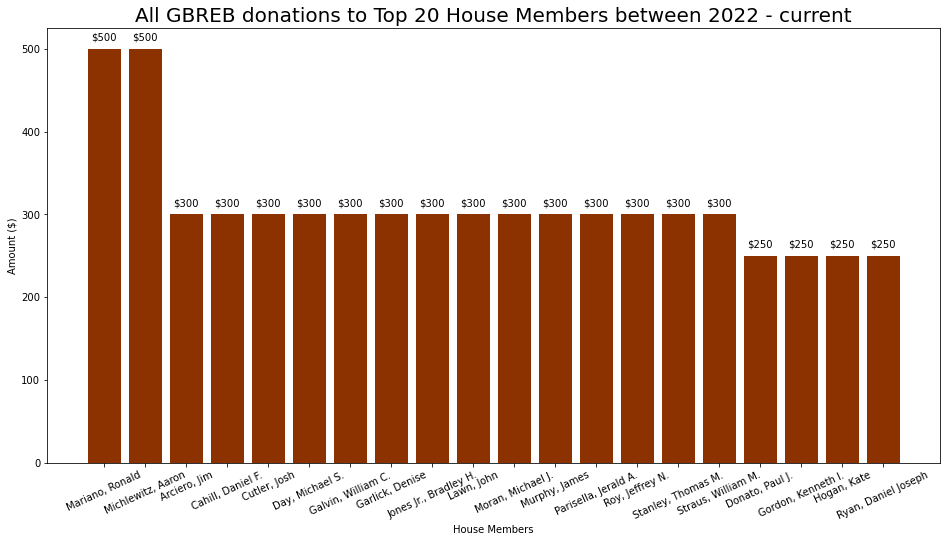

In [29]:
#House member plot
houseMem_label = ["","","","","","","","","","","","","","","","","","","",""]
for i in range(len(houseMem_label)):
    houseMem_label[i] = "$"+str(houseMem_y[i]).split(".")[0]

houseMem_color = ["#8C3200","#8C3200","#8C3200","#8C3200","#8C3200","#8C3200","#8C3200","#8C3200","#8C3200","#8C3200","#8C3200","#8C3200","#8C3200","#8C3200","#8C3200","#8C3200","#8C3200","#8C3200","#8C3200","#8C3200"]

fig, ax = plt.subplots(figsize=(16,8))
plt.bar(houseMem_x, houseMem_y,width = 0.8, color = houseMem_color)
plt.xticks(houseMem_x, rotation=25)
plt.xlabel('House Members')
plt.ylabel("Amount ($)")
plt.title("All GBREB donations to Top 20 House Members between 2022 - current", fontsize=20)

for index in range(len(houseMem_label)):
    ax.text(index-0.32, houseMem_y[index]+10, houseMem_label[index], size=10)
    
plt.savefig("/Users/ahnbh/Spark! file/Lobbist project/House Member.jpg", format='jpg')  
plt.show()

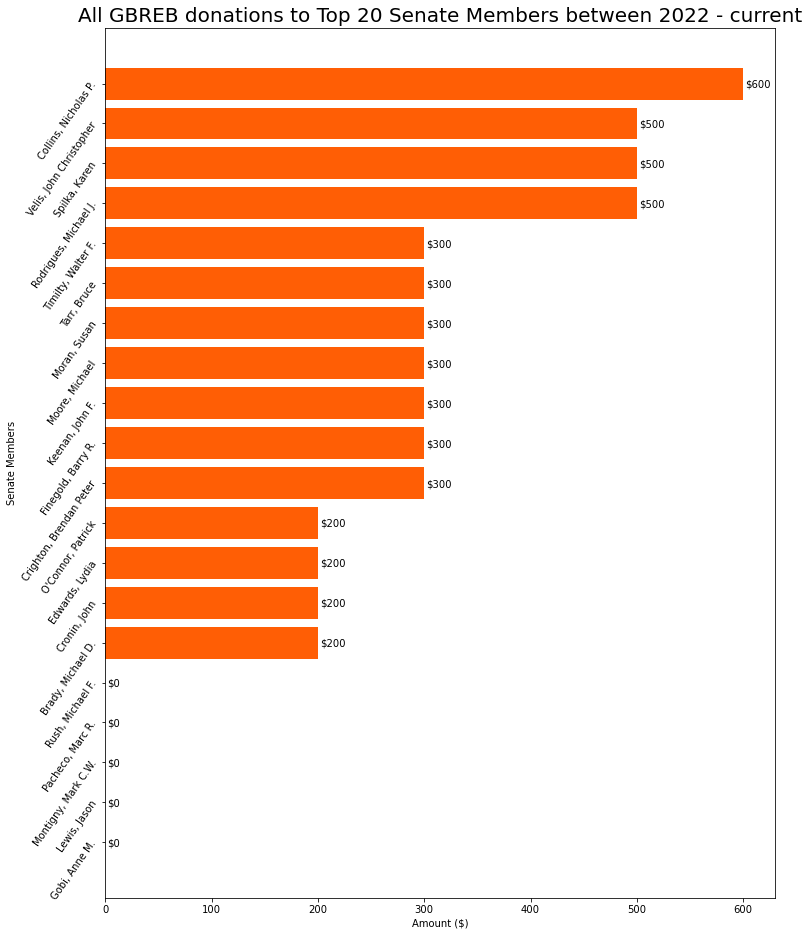

In [30]:
# Senate member plot
senate_label = ["","","","","","","","","","","","","","","","","","","",""]
for i in range(len(senate_label)):
    senate_label[i] = "$"+str(senate_y[i]).split(".")[0]

senate_color = ["#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05"]

fig, ax = plt.subplots(figsize=(12, 16))
plt.barh(senate_x, senate_y,  color = senate_color)
# plt.xticks(senate_x, rotation = 25)
plt.xlabel('Amount ($)')
plt.ylabel("Senate Members")
plt.yticks(senate_x, rotation=55)
plt.title("All GBREB donations to Top 20 Senate Members between 2022 - current", fontsize=20)

for index in range(len(senate_label)):
    ax.text(senate_y[index]+2, index-0.1, senate_label[index], size=10)
    
plt.savefig("/Users/ahnbh/Spark! file/Lobbist project/Senate Member.jpg", format='jpg')  
plt.show()

In [31]:
city = {"Arroyo, Recardo":0, "Flaherty Jr., Michael F.":0, "Louijeune, Ruthzee":0, "Mejia, Julia":0, "Baker, Frank":0, "Worrell, Brian":0, 
       "Bok, Priscilla MacKenzie":0, "Breadon, Elizabeth A.":0, "Murphy, Erin":0, "Coletta, Gabriela":0, "Lara, Kendra":0, 
       "Anderson, Tania Fernandes":0, "Flynn, Ed.":0, "Wu, Michelle":0}

print(len(city))

14


In [32]:
for i in range(len(to_city)):
        amount = to_city["Amount"][i].split("$")[1]
#      if (amount.count(",") > 0):
#           amount = amount.split(",")[0] + amount.split(",")[1]
        for name in list(city.keys()):
            if (to_city["Recipient"][i] == name):
                city[name] = city[name] + float(amount)

sortedCity = sorted(city.items(), key = lambda x:x[1], reverse=True)
city = dict(sortedCity)
print(city)

{'Flaherty Jr., Michael F.': 2850.0, 'Baker, Frank': 2150.0, 'Wu, Michelle': 1650.0, 'Worrell, Brian': 250.0, 'Bok, Priscilla MacKenzie': 250.0, 'Breadon, Elizabeth A.': 250.0, 'Arroyo, Recardo': 0, 'Louijeune, Ruthzee': 0, 'Mejia, Julia': 0, 'Murphy, Erin': 0, 'Coletta, Gabriela': 0, 'Lara, Kendra': 0, 'Anderson, Tania Fernandes': 0, 'Flynn, Ed.': 0}


In [33]:
city_x = list(city.keys())
for i in range(len(city_x)):
    if (city_x[i] == "Anderson, Tania Fernandes"):
        city_x[i] = "Anderson, Tania F."
print(city_x)

city_y = list(city.values())
print(city_y)

total_city = 0
for i in range(len(city_y)):
    total_city += city_y[i]
print("$"+str(total_city).split(".")[0])

['Flaherty Jr., Michael F.', 'Baker, Frank', 'Wu, Michelle', 'Worrell, Brian', 'Bok, Priscilla MacKenzie', 'Breadon, Elizabeth A.', 'Arroyo, Recardo', 'Louijeune, Ruthzee', 'Mejia, Julia', 'Murphy, Erin', 'Coletta, Gabriela', 'Lara, Kendra', 'Anderson, Tania F.', 'Flynn, Ed.']
[2850.0, 2150.0, 1650.0, 250.0, 250.0, 250.0, 0, 0, 0, 0, 0, 0, 0, 0]
$7400


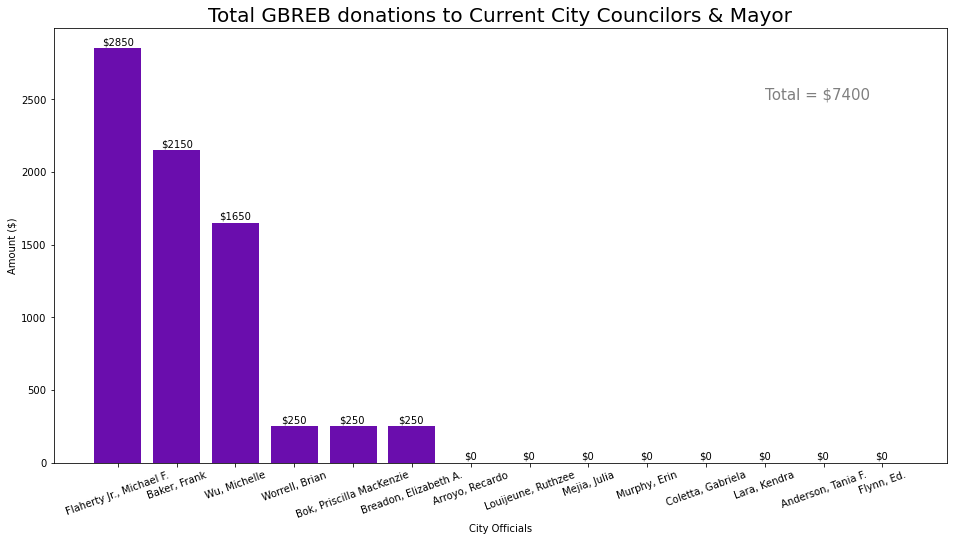

In [34]:
city_label = ["","","","","","","","","","","","","",""]
for i in range(len(city_label)):
    city_label[i] = "$"+str(city_y[i]).split(".")[0]

city_v = [0,1,2]
city_u = [3,4,5]
city_0 = [6,7,8,9,10,11,12,13]
city_color = ["#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD","#6A0DAD"]

fig, ax = plt.subplots(figsize=(16,8))
plt.bar(city_x, city_y,width = 0.8, color=city_color)
plt.xticks(city_x, rotation=20)
plt.xlabel('City Officials')
plt.ylabel("Amount ($)")
plt.title("Total GBREB donations to Current City Councilors & Mayor", fontsize=20)
plt.text(11, 2500, "Total = "+str("$"+str(total_city).split(".")[0]), fontsize=15, alpha=0.5)


for index in city_v:
    ax.text(index-0.27, city_y[index]+23, city_label[index], size=10)
for index in city_u:
    ax.text(index-0.23, city_y[index]+23, city_label[index], size=10)
for index in city_0:
    ax.text(index-0.12, city_y[index]+23, city_label[index], size=10)
    
plt.savefig("/Users/ahnbh/Spark! file/Lobbist project/city_officials_total.jpg", format='jpg')  
plt.show()

In [35]:
houseMem = {"Arciero, Jim": 0, "Ayers, Bruce J." :0, "Barber, Christine P.": 0, "Biele, David M.": 0, "Cabral, Antonio F. D.": 0,
           "Cahill, Daniel F.": 0, "Chan, Tackey": 0, "Consalvo, Rob": 0, "Cusack, Mark James": 0, "Cutler, Josh": 0, "Day, Michael S.": 0,
           "Decker, Marjorie C.": 0, "Donahue, Daniel M.": 0, "Donato, Paul J.": 0, "Driscoll, William J.": 0, "Ferrante, Ann-Margaret": 0,
           "Finn, Michael J.": 0, "Fluker Oakley, Brandy": 0, "Galvin, William C.": 0, "Garlick, Denise": 0, "Giannino, Jessica": 0,
           "Gonzalez, Carlos": 0, "Gordon, Kenneth I.": 0, "Gregoire, Danielle W.": 0, "Haddad, Patricia A.": 0, "Haggerty, Richard M.": 0,
           "Hogan, Kate": 0, "Holmes, Russell": 0, "Honan, Kevin G.": 0, "Hunt, Daniel J.": 0, "Jones Jr., Bradley H.": 0, "Kilcoyne, Meghan": 0,
           "Lawn, John": 0, "LeBoeuf, David Henry Argosky": 0, "Livingstone, Jay": 0, "Madaro, Adrian": 0, "Mahoney, John J.":0, "Mariano, Ronald": 0,
           "McGonagle, Joseph W.": 0, "McMurtry, Paul": 0, "Meschino, Joan": 0, "Michlewitz, Aaron": 0, "Mom, Rady": 0, "Moran, Michael J.": 0,
           "Murphy, James": 0, "Nguyen, Tram": 0, "O'Day, James J.": 0, "Parisella, Jerald A.": 0, "Peake, Sarah": 0, "Philips, Edward Ryan": 0,
           "Rogers, David M.": 0, "Rogers, John H.": 0, "Roy, Jeffrey N.": 0, "Ryan, Daniel Joseph": 0, "Stanley, Thomas M.":0,
           "Straus, William M.": 0, "Tyler, Chynah": 0, "Ultrino, Steven": 0, "Vitolo, Thomas J.": 0}

senate = {"Brady, Michael D.": 0, "Collins, Nicholas P.": 0, "Creem, Cynthia S.": 0, "Crighton, Brendan Peter": 0, "Cronin, John": 0,
         "Cyr, Julian Andre": 0, "DiDomenico, Sal N.": 0, "Edwards, Lydia": 0, "Feeney, Paul": 0, "Finegold, Barry R.": 0, "Gobi, Anne M.": 0,
         "Keenan, John F.": 0, "Lewis, Jason": 0, "Montigny, Mark C.W.": 0, "Moore, Michael": 0, "Moran, Susan": 0, "O'Connor, Patrick": 0,
         "Pacheco, Marc R.": 0, "Rodrigues, Michael J.": 0, "Rush, Michael F.": 0, "Spilka, Karen": 0, "Tarr, Bruce": 0, "Timilty, Walter F.": 0,
         "Velis, John Christopher": 0}

#Mariano, Ronald has -300 in syntex of (#300). Check if it causes error
House_T = pd.read_csv("C:/Users/ahnbh/Spark! file/Lobbist project/GBREB_to_Coun.csv", usecols=["Date","Amount"])
Senate_T = pd.read_csv("C:/Users/ahnbh/Spark! file/Lobbist project/GBREB_to_Coun.csv", usecols=["Date","Amount"])

In [36]:
# Calculating subtotal for House Members
for i in range(len(to_state)):
        amount = to_state["Amount"][i].split("$")[1]
        if (amount.count(",") > 0):
            amount = amount.split(",")[0] + amount.split(",")[1]
        for name in list(houseMem.keys()):
            if (to_state["Recipient"][i] == name):
                if (amount.count(")") > 0):
                    amount = amount.split("-")[0]
                    amount = amount.split(")")[0]
                    houseMem[name] = houseMem[name] - float(amount)
                else:
                    houseMem[name] = houseMem[name] + float(amount)

sortedHM = sorted(houseMem.items(), key = lambda x:x[1], reverse=True)
houseMem = dict(sortedHM)
print(houseMem)

{'Jones Jr., Bradley H.': 5400.0, 'Honan, Kevin G.': 5300.0, 'Straus, William M.': 3600.0, 'Michlewitz, Aaron': 3300.0, 'Mariano, Ronald': 3000.0, 'Hogan, Kate': 2500.0, 'Donato, Paul J.': 2450.0, 'Rogers, John H.': 2350.0, 'Murphy, James': 2300.0, 'Stanley, Thomas M.': 2300.0, 'Galvin, William C.': 2200.0, 'Moran, Michael J.': 1950.0, 'Cusack, Mark James': 1750.0, 'Ryan, Daniel Joseph': 1700.0, 'Arciero, Jim': 1650.0, 'Lawn, John': 1600.0, 'Chan, Tackey': 1550.0, 'Garlick, Denise': 1450.0, 'Parisella, Jerald A.': 1450.0, 'Livingstone, Jay': 1200.0, 'Roy, Jeffrey N.': 1200.0, 'Consalvo, Rob': 1150.0, 'Madaro, Adrian': 1100.0, "O'Day, James J.": 1100.0, 'Day, Michael S.': 950.0, 'Cahill, Daniel F.': 900.0, 'Mahoney, John J.': 900.0, 'Decker, Marjorie C.': 700.0, 'Gordon, Kenneth I.': 700.0, 'McMurtry, Paul': 650.0, 'Barber, Christine P.': 600.0, 'Rogers, David M.': 600.0, 'Cutler, Josh': 550.0, 'Driscoll, William J.': 450.0, 'Cabral, Antonio F. D.': 400.0, 'McGonagle, Joseph W.': 400.0,

NameError: name 'total_senate' is not defined

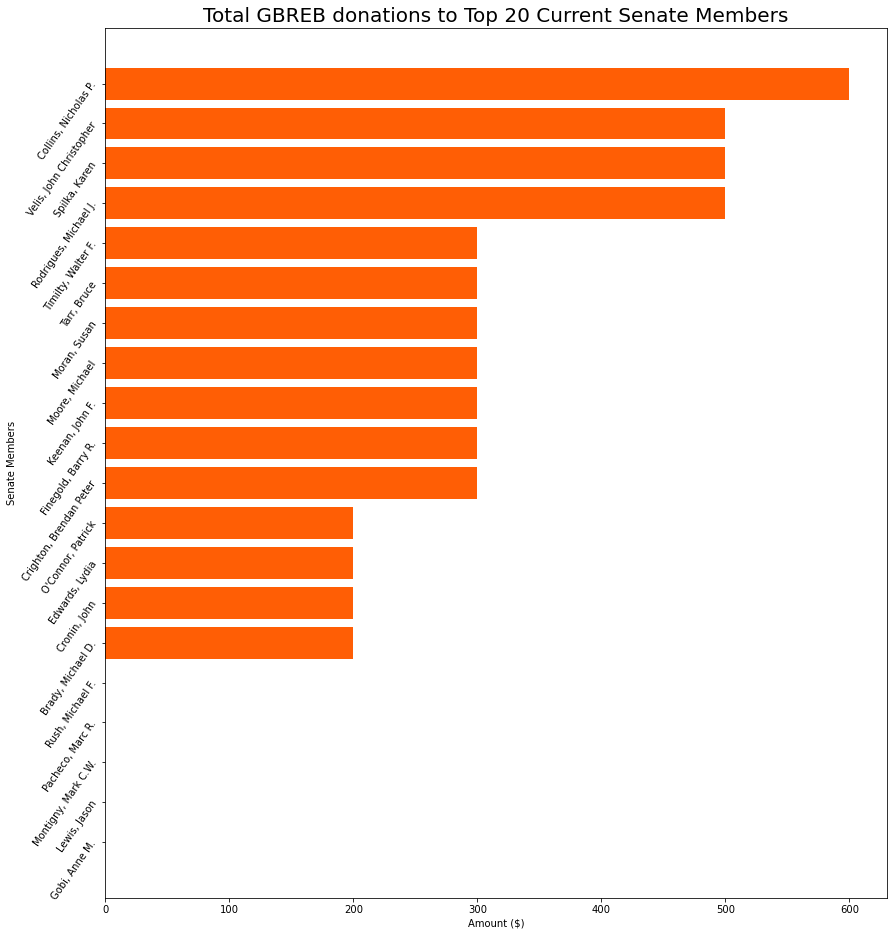

In [37]:
# Senate member plot
senate_label = ["","","","","","","","","","","","","","","","","","","",""]
for i in range(len(senate_label)):
    senate_label[i] = "$"+str(senate_y[i]).split(".")[0]

senate_color = ["#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05"]

fig, ax = plt.subplots(figsize=(14, 16))
plt.barh(senate_x, senate_y,  color = senate_color)
# plt.xticks(senate_x, rotation = 25)
plt.xlabel('Amount ($)')
plt.ylabel("Senate Members")
plt.yticks(senate_x, rotation=55)
plt.title("Total GBREB donations to Top 20 Current Senate Members", fontsize=20)
plt.text(3800, 3, "Total = "+str("$"+str(total_senate).split(".")[0]), fontsize=15, alpha=0.5)


for index in range(len(senate_label)):
    ax.text(senate_y[index]+2, index-0.1, senate_label[index], size=10)
    
plt.savefig("/Users/ahnbh/Spark! file/Lobbist project/Senate Member Total.jpg", format='jpg')  
plt.show()

In [40]:
folders = ["A.D. Makepeace Company", "Abundant Housing MA, Inc", "Atlantic Management", "Beacon Communities", "Boston Properties", 
           "Cargo Ventures", "Claremont Companies", "Commercial Wharf", "CV Properties", "First Atlantic", "Greathorse",
          "Groma", "Hometown America", "Mark Development", "Marwick", "Massachusetts Association of Realtors", "MG2 Group", 
          "NAIOP Massachusetts", "Nan Fung Life Sciences Real Estate", "Neighborhood Housing Services", "Planning Office for Urban Affairs",
          "Pulte Homes of New England", "Regional Housing Network of Massachusetts", "Rise Construction Management", 
          "TDC Development Group", "TMI Property Management & Development", "Westmass Area Development Corporation", 
          "WinnDevelopment Company Limited Partnership"]



In [41]:
years = [2021,2022,2023]

In [52]:
print(senates_y)
p=0
for i in senates_y:
    p += i
print(p)

[200.0, 200.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
400.0


C:\Users\ahnbh\AppData\Local\Temp/ipykernel_38036/3898844060.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(16,8))


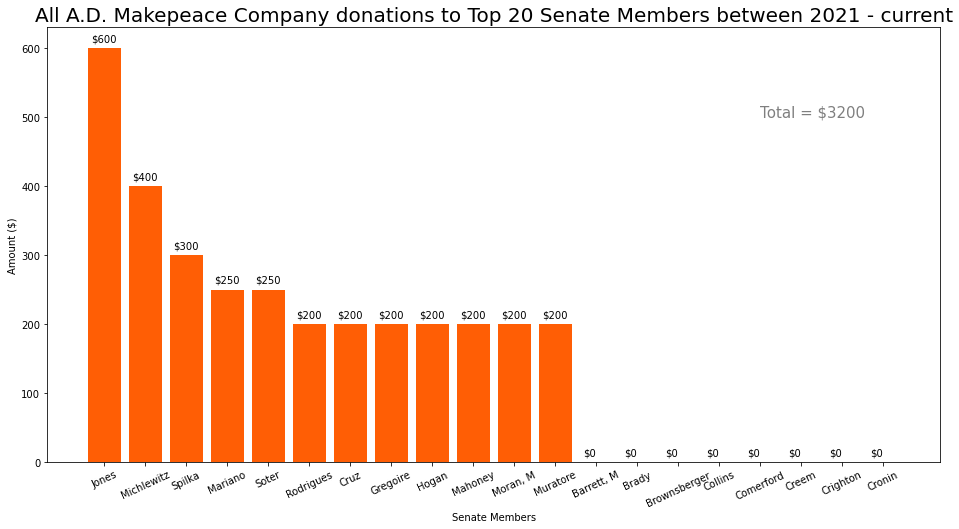

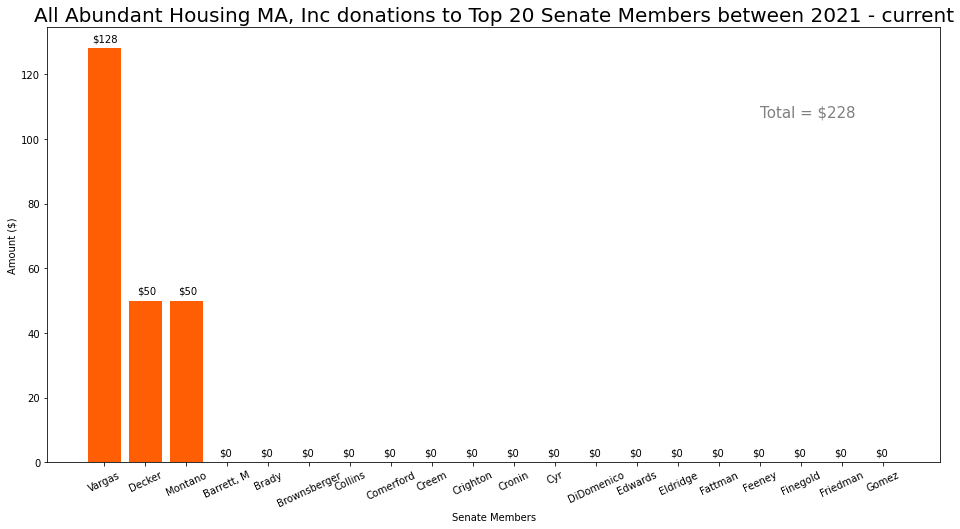

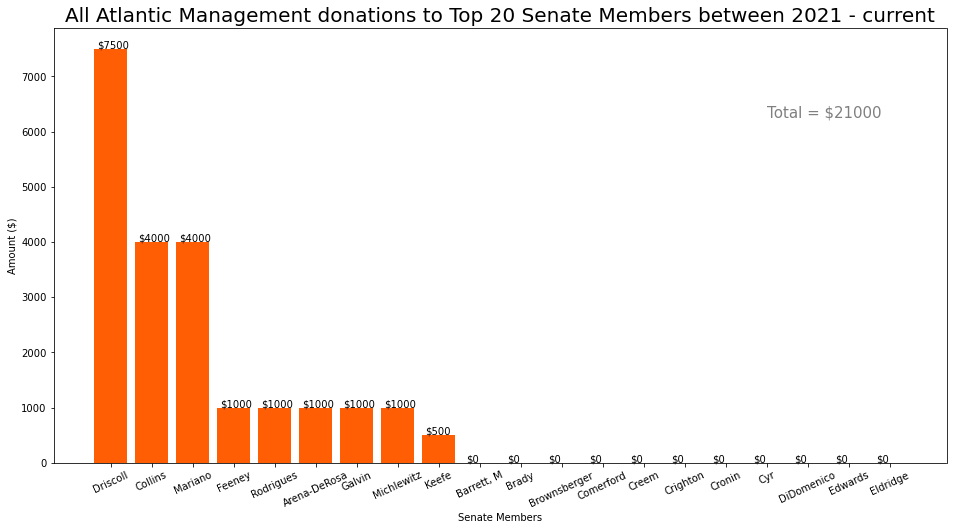

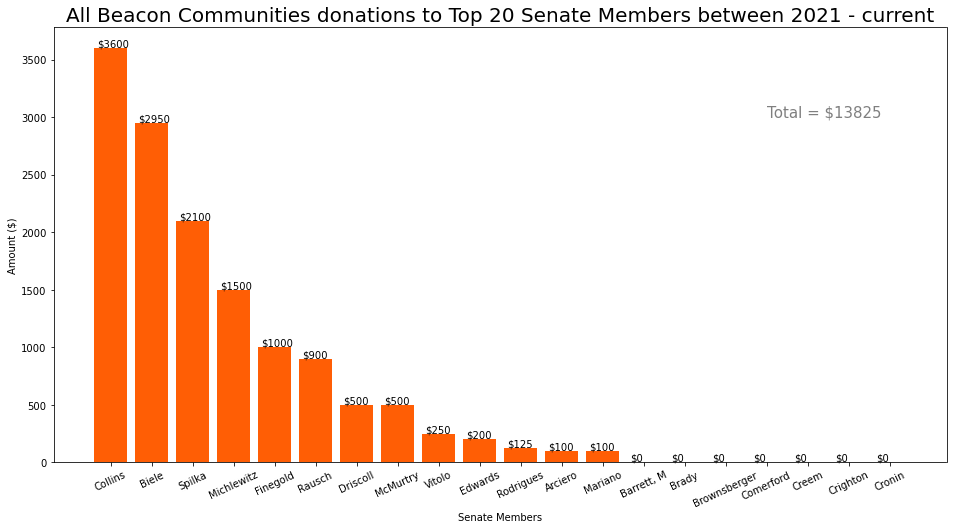

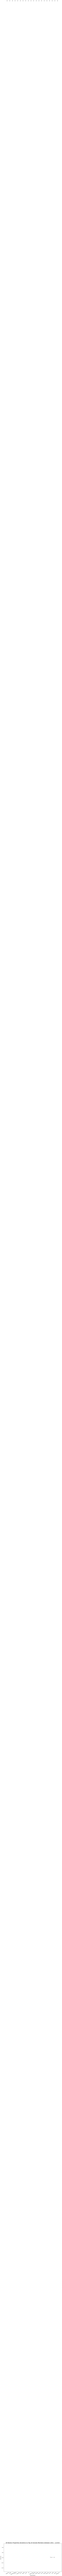

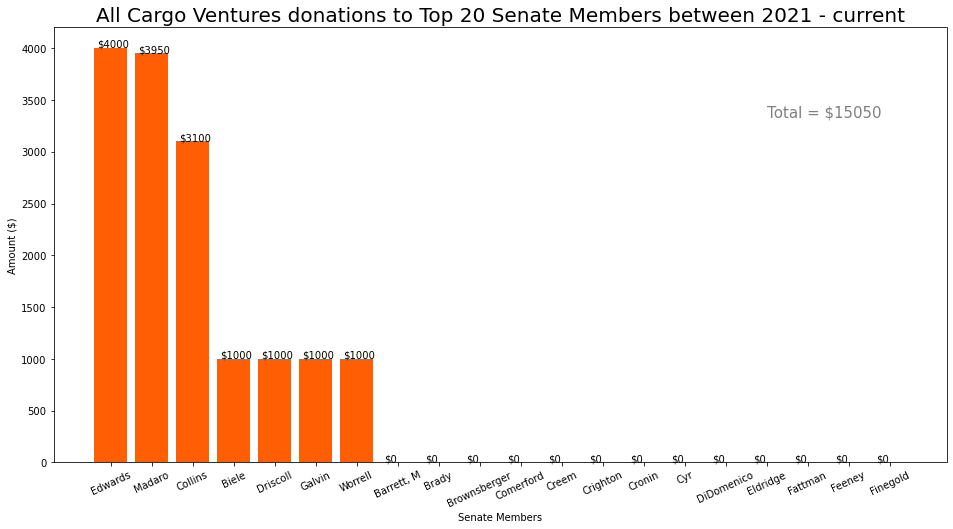

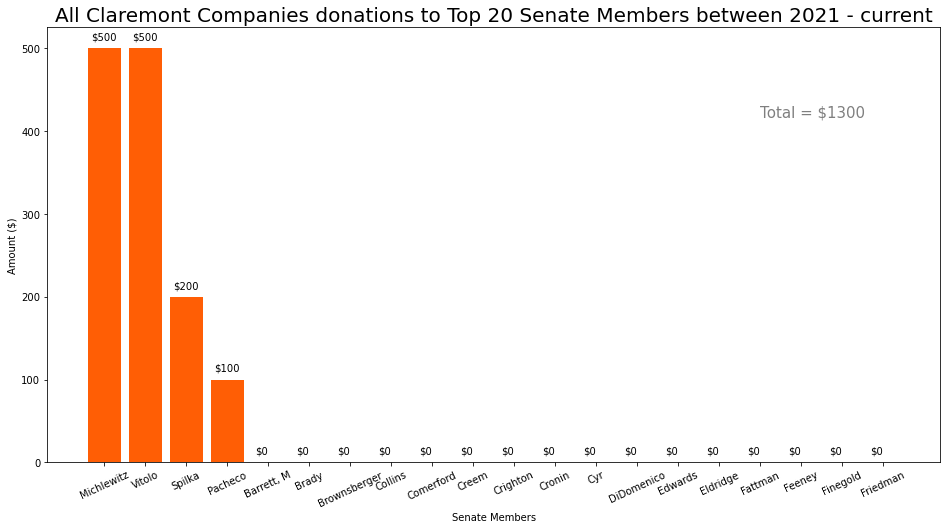

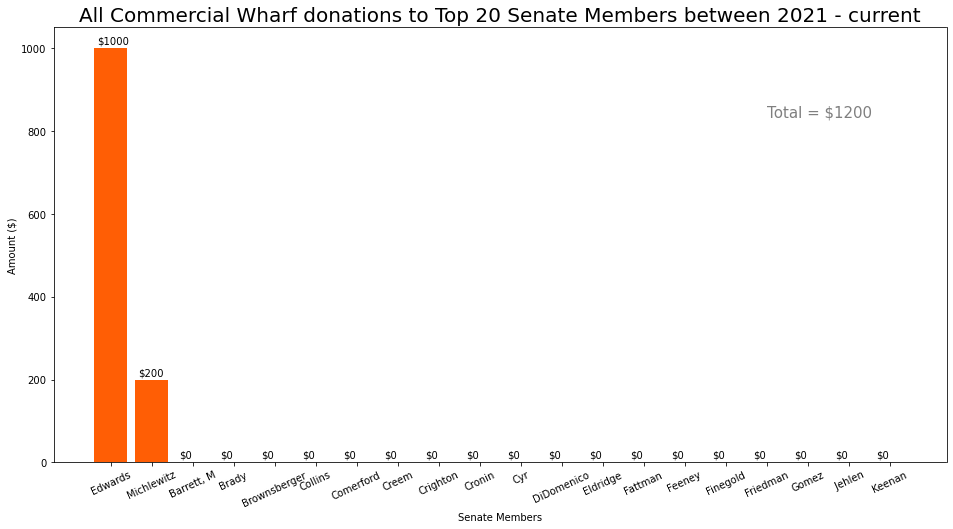

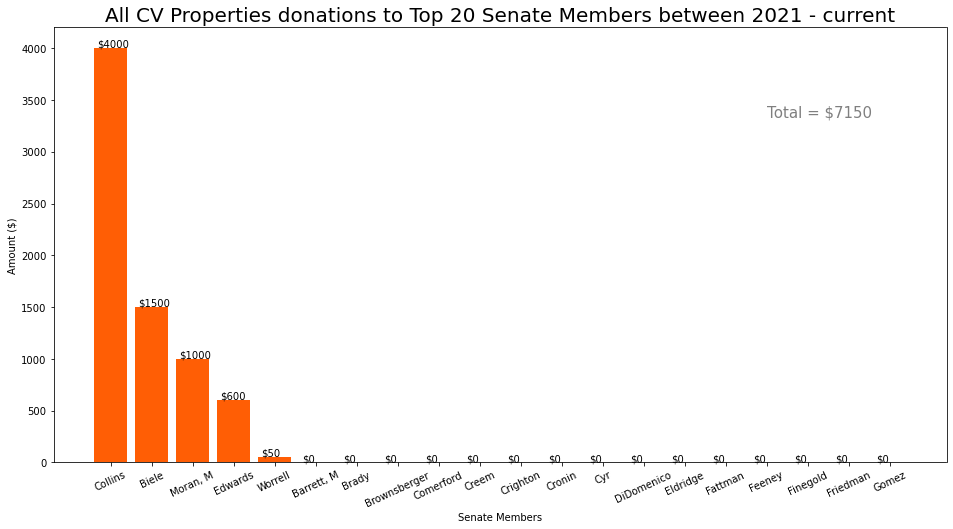

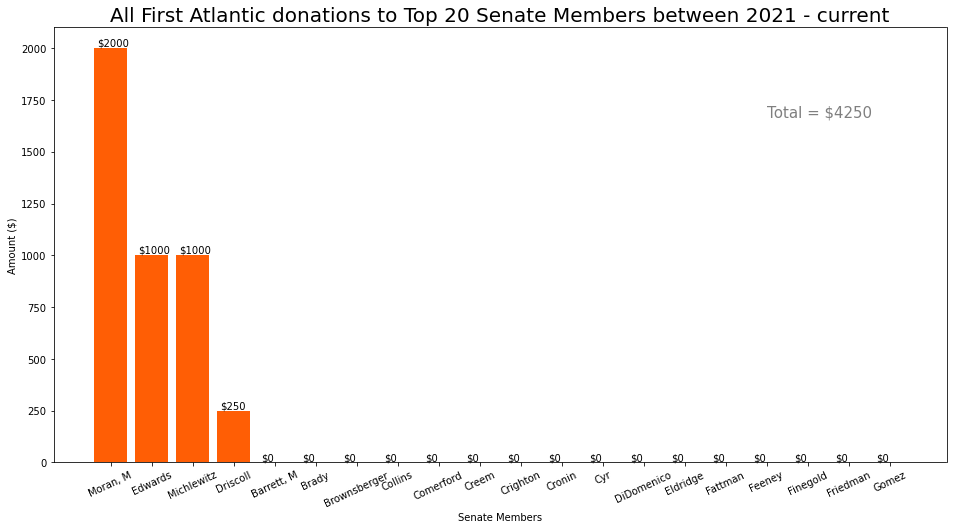

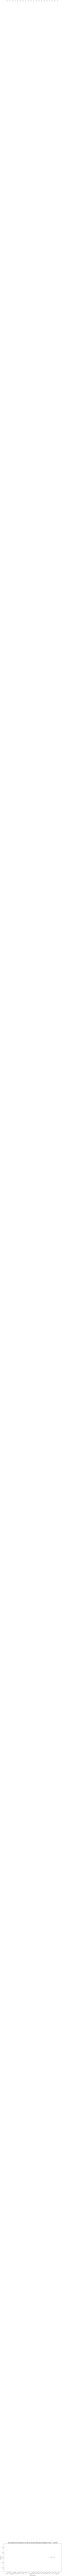

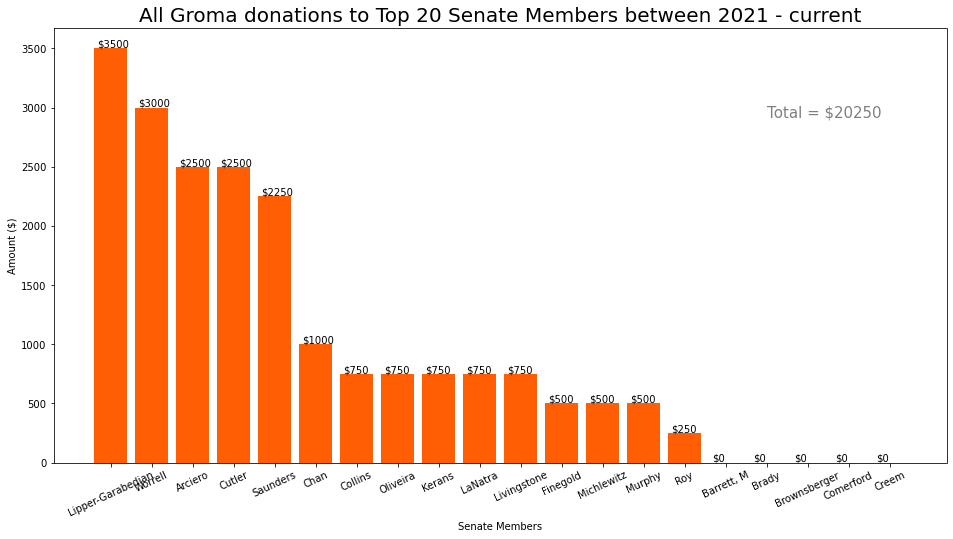

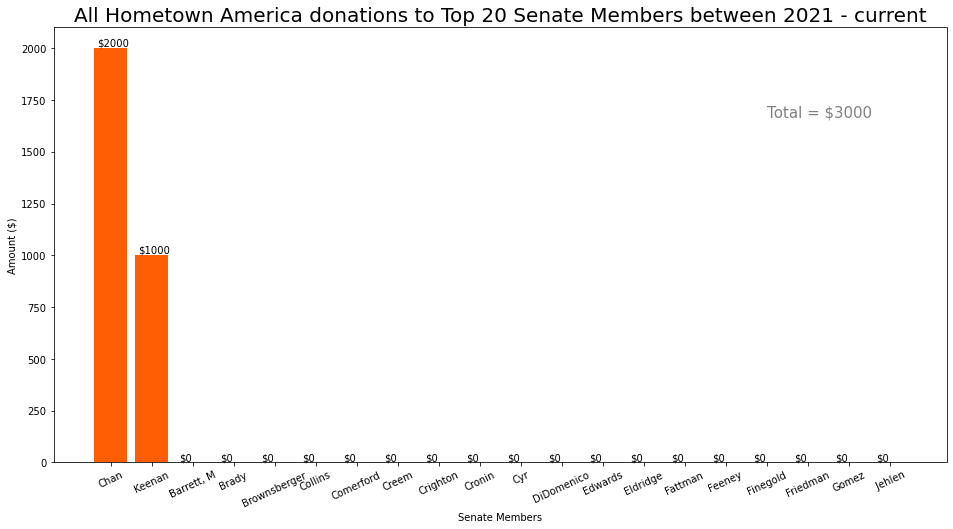

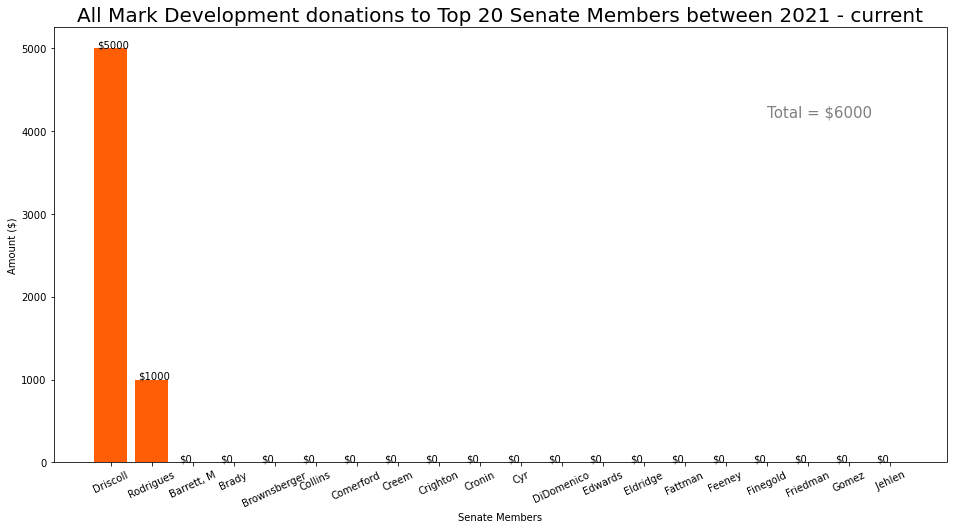

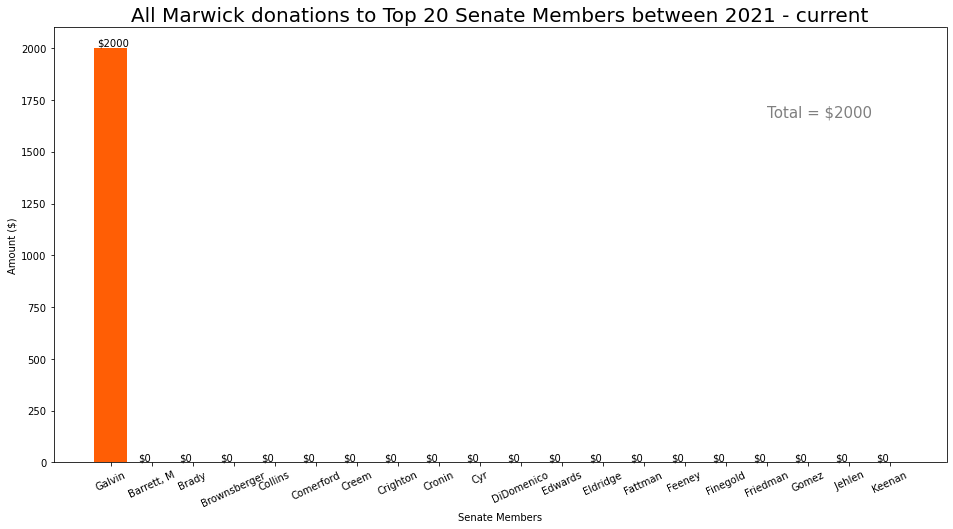

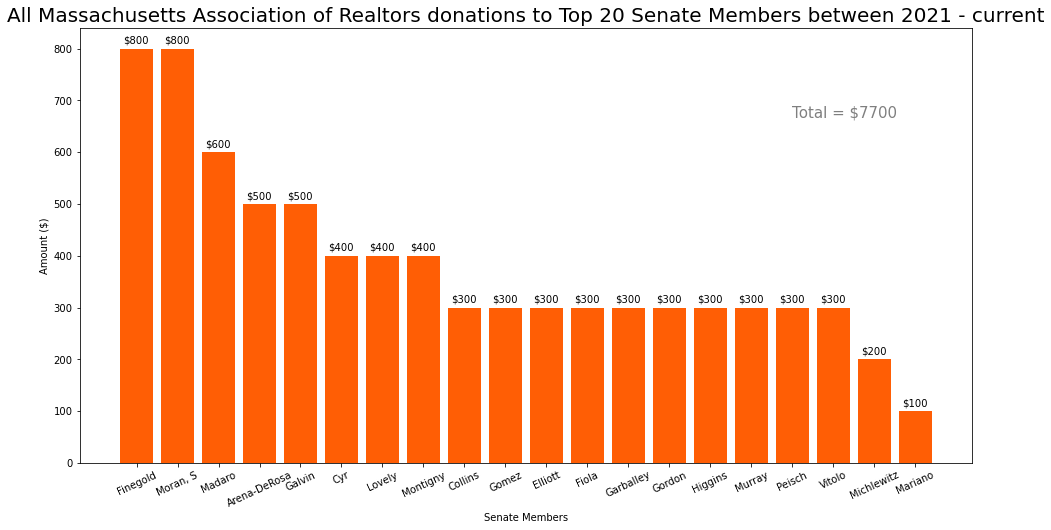

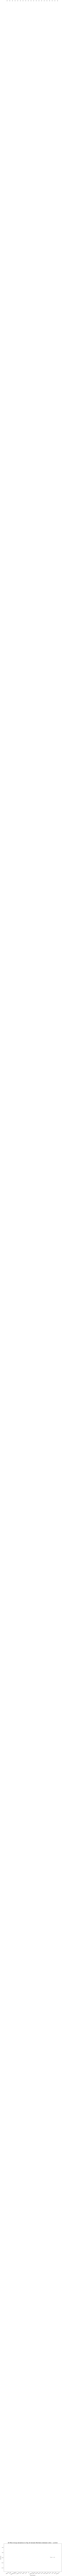

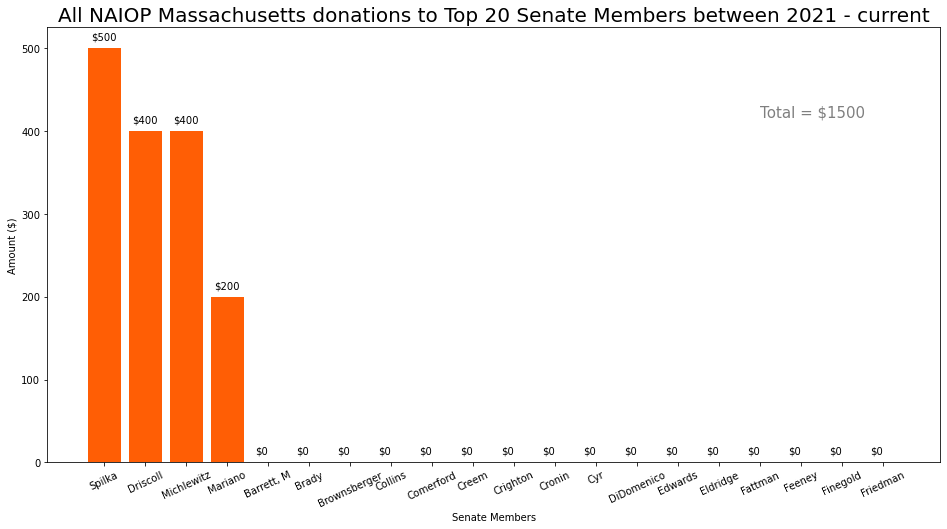

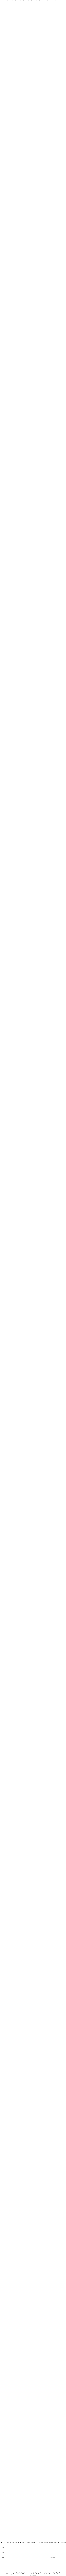

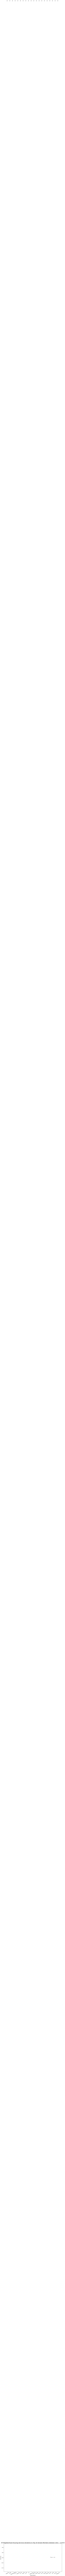

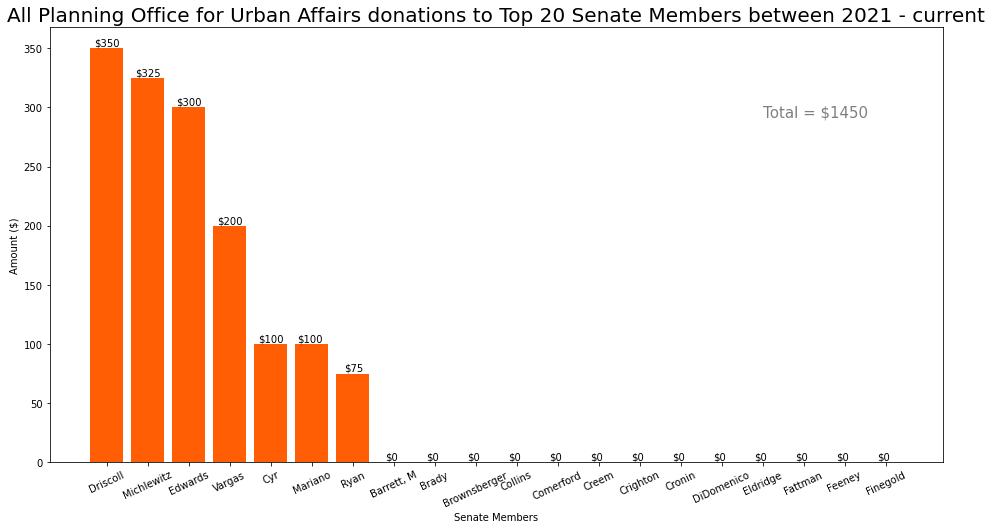

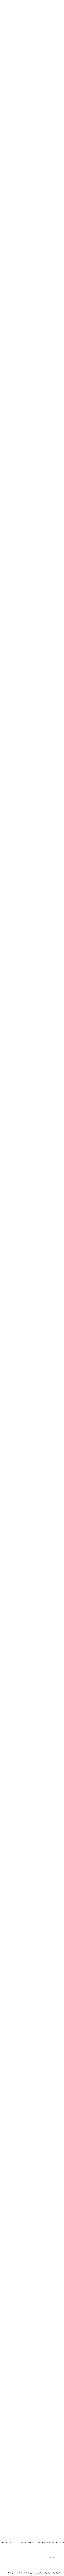

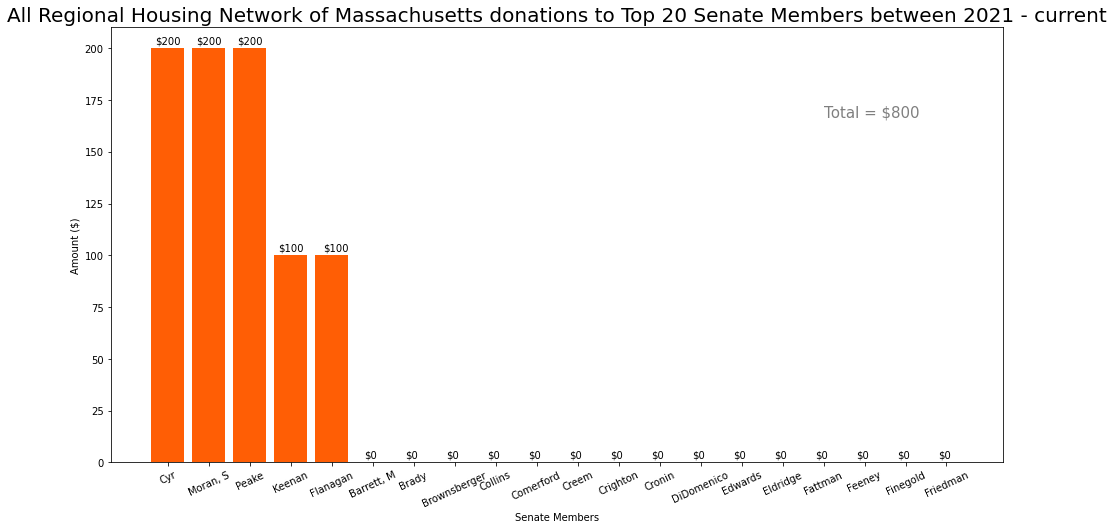

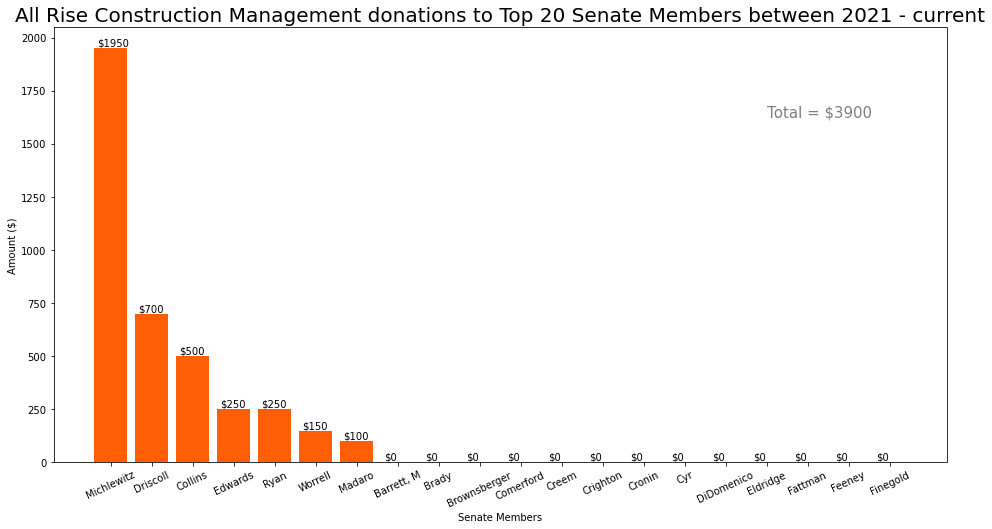

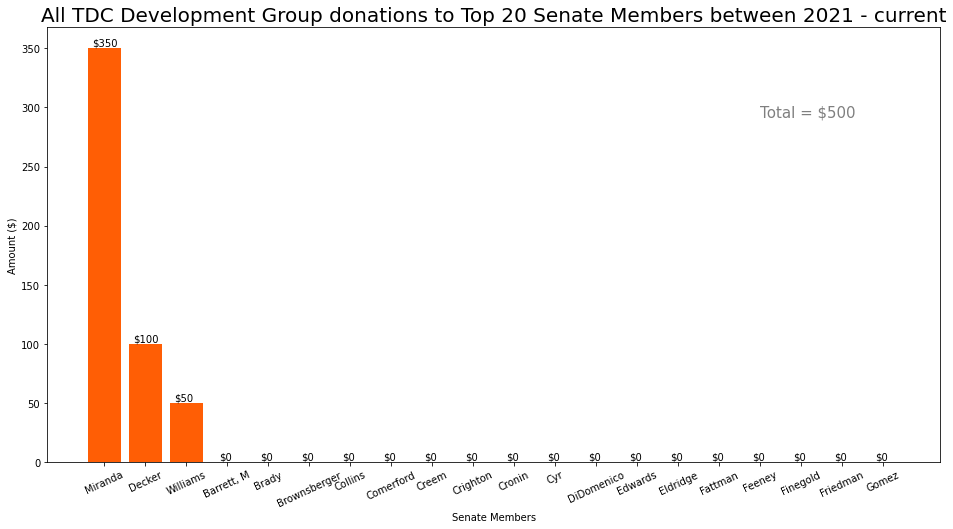

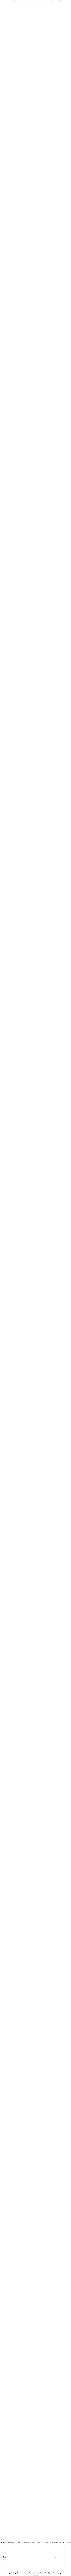

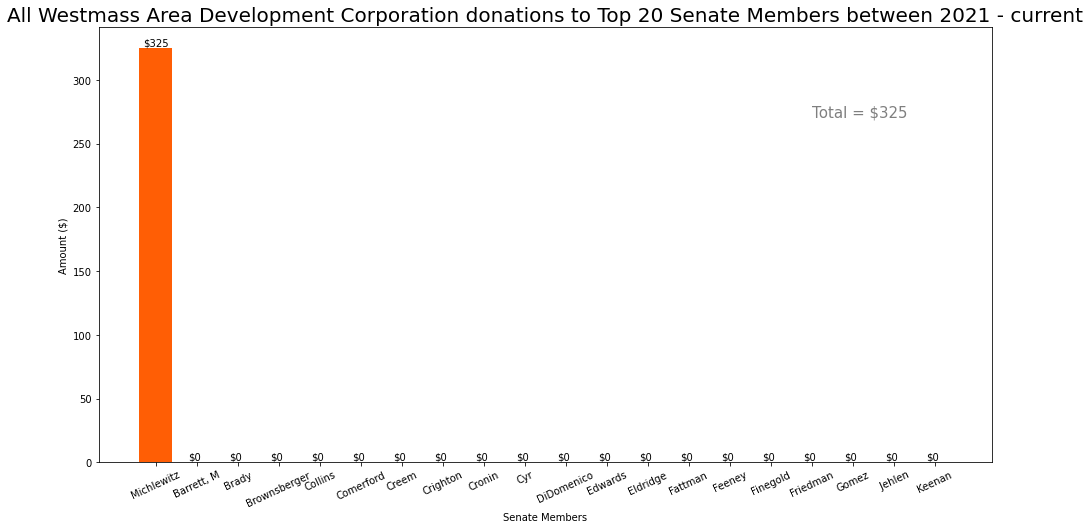

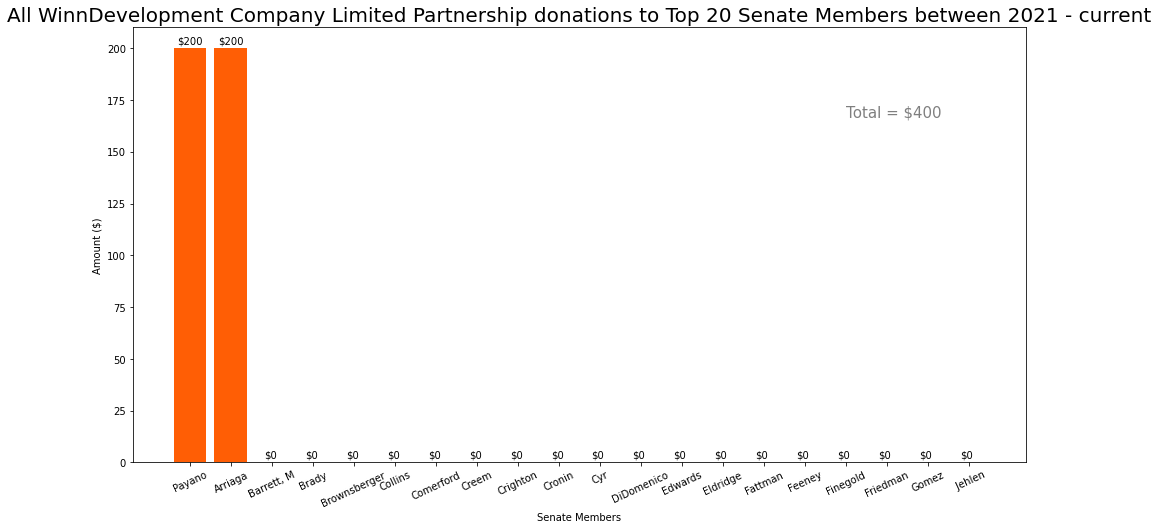

In [57]:
for folder in range(len(folders)):
    folder_path = "C:/Users/ahnbh/Spark! file/Lobbist project/" + folders[folder] + "/" + folders[folder] + ".csv"
    companies = pd.read_csv(folder_path, usecols=["Date", "Contributor", "Zip", "Amount", "Recipient", "Record Type Description", "Source Description"])
    
    TotalValue = 0
    
    senates = {"Barrett, M": 0, "Brady": 0, "Brownsberger": 0, "Collins": 0, "Comerford": 0, "Creem": 0, "Crighton": 0, "Cronin": 0,
         "Cyr": 0, "DiDomenico": 0, "Edwards": 0, "Eldridge": 0, "Fattman": 0, "Feeney": 0, "Finegold": 0, "Friedman": 0,
         "Gomez": 0, " Jehlen": 0, "Keenan": 0, "Kennedy, E": 0, "Kennedy, R": 0, "Lewis, Jason": 0, "Lovely": 0, 
         "Mark": 0, "Miranda": 0, "Montigny": 0, "Moore": 0, "Moran, S": 0, "O'Connor": 0, "Oliveira": 0, "Pacheco": 0, "Payano": 0, 
         "Rausch": 0, "Rodrigues": 0, "Rush": 0, "Spilka": 0, "Tarr": 0, "Timilty": 0, "Velis": 0,
         "Arciero": 0, "Arena-DeRosa": 0, "Armini": 0, "Arriaga": 0, "Ashe": 0, "Ayers": 0, "Balser": 0, "Barber": 0, "Barrett, J": 0,
         "Barrows": 0, "Berthiaume": 0, "Biele": 0, "Blais": 0, "Boldyga": 0, "Cabral": 0, "Cahill": 0, "Capano": 0, "Carey": 0,
         "Cassidy": 0, "Cataldo": 0, "Chan": 0, "Ciccolo": 0, "Connolly": 0, "Consalvo": 0, "Cruz": 0, "Cusack": 0, "Cutler": 0,
         "D'Emilia": 0, "Day": 0, "Decker": 0, "DeCoste": 0, "Diggs": 0, "Doherty": 0, "Domb": 0, "Donaghue": 0, "Donahue": 0, 
         "Donato": 0, "Driscoll": 0, "DuBois": 0, "Duffy": 0, "Durant": 0, "Elliott": 0, "Farley-Bouvier": 0, "Ferguson": 0,
         "Fernandes": 0, "Ferrante": 0, "Finn": 0, "Fiola": 0, "Flanagan": 0, "Fluker Oakley": 0, "Frost": 0, "Galvin": 0,
         "Garballey": 0, "Garcia": 0, "Garlick": 0, "Garry": 0, "Gentile": 0, "Giannino": 0, "Gifford": 0, "González": 0,
         "Gordon": 0, "Gregoire": 0, "Haddad": 0, "Haggerty": 0, "Hamilton": 0, "Hawkins": 0, "Hendricks": 0, "Higgins": 0,
         "Hogan": 0, "Holmes": 0, "Honan": 0, "Howard": 0, "Howitt": 0, "Hunt": 0, "Jones": 0, "Kane": 0, "Kassner": 0,
         "Kearney": 0, "Keefe": 0, "Kerans": 0, "Khan": 0, "Kilcoyne": 0, "Kushmerek": 0, "LaNatra": 0, "Lawn": 0, "LeBoeuf": 0, 
         "Lewis, Jack": 0, "Linsky": 0, "Lipper-Garabedian": 0, "Livingstone": 0, "Lombardo": 0, "MacGregor": 0, "Madaro": 0,
         "Mahoney": 0, "Mariano": 0, "Markey": 0, "McGonagle": 0, "McKenna": 0, "McMurtry": 0, "Mendes": 0, "Meschino": 0,
         "Michlewitz": 0, "Mom": 0, "Montano": 0, "Moran, F": 0, "Moran, J": 0, "Moran, M": 0, "Muradian": 0, "Muratore": 0,
         "Murphy": 0, "Murray": 0, "Nguyen": 0, "O'Day": 0, "Orrall": 0, "Owens": 0, "Parisella": 0, "Paulino": 0, "Peake": 0,
         "Pease": 0, "Peisch": 0, "Philips": 0, "Pignatelli": 0, "Puppolo": 0, "Ramos, A": 0, "Ramos, O": 0, "Reyes": 0, 
         "Robertson": 0, "Rogers, D": 0, "Rogers, J": 0, "Roy": 0, "Ryan": 0, "Sabadosa": 0, "Saunders": 0, "Scanlon": 0,
         "Scarsdale": 0, "Schmid": 0, "Sena": 0, "Shand": 0, "Silvia": 0, "Smola": 0, "Soter": 0, "Sousa": 0, "Stanley": 0,
         "Straus": 0, "Sullivan-Almeida": 0, "Turco": 0, "Tyler": 0, "Ultrino": 0, "Uyterhoeven": 0, "Vargas": 0, "Vaughn": 0,
         "Vieira": 0, "Vitolo": 0, "Walsh": 0, "Whipps": 0, "Williams": 0, "Wong": 0, "Worrell": 0, "Xiarhos": 0, "Zlotnik": 0}
    
    # Barrett, Kennedy, Lewis, Montaño, Moran, Ramos, Rogers
    for i in range(len(companies)):
        for year in range(len(years)):
            if (companies["Date"][i].split("/")[2] == str(years[year])):
                amount = companies["Amount"][i].split("$")[1]
                if (amount.count("-") > 0):
                    amount = amount.split("-")[1]
                if (amount.count(",") > 0):
                    amount = amount.split(",")[0] + amount.split(",")[1]
                for name in list(senates.keys()):
                    firstName = companies["Recipient"][i].split(",")[0]
                    if (firstName == "Barrett"):
                        if (name.split(",")[0] == "Barrett"):
                            if (companies["Recipient"][i].split(",")[1].split(" ")[1].startswith(name.split(", ")[1], 0, 1)):
                                senates[name] = senates[name] + float(amount)
                    elif (firstName == "Kennedy"):
                        if (name.split(",")[0] == "Kennedy"):
                            if (companies["Recipient"][i].split(",")[1].split(" ")[1].startswith(name.split(", ")[1], 0, 1)):
                                senates[name] = senates[name] + float(amount)
                    elif (firstName == "Montaño"):
                        matchingName = "Montano"
                        if (matchingName == name):
                            senates[name] = senates[name] + float(amount)
                    elif (firstName == "Moran"):
                        if (name.split(",")[0] == "Moran"):
                            if (companies["Recipient"][i].split(",")[1].split(" ")[1].startswith(name.split(", ")[1], 0, 1)):
                                senates[name] = senates[name] + float(amount)
                    elif (firstName == "Ramos"):
                        if (name.split(",")[0] == "Ramos"):
                            if (companies["Recipient"][i].split(",")[1].split(" ")[1].startswith(name.split(", ")[1], 0, 1)):
                                senates[name] = senates[name] + float(amount)
                    elif (firstName == "Rogers"):
                        if (name.split(",")[0] == "Rogers"):
                            if (companies["Recipient"][i].split(",")[1].split(" ")[1].startswith(name.split(", ")[1], 0, 1)):
                                senates[name] = senates[name] + float(amount)
                    elif (firstName == "Lewis"):
                        lastName = companies["Recipient"][i].split(",")[1].split(" ")[1]
                        if (lastName == name.split(", ")[1]):
                            senates[name] = senates[name] + float(amount)
                    elif (firstName == name):
                        senates[name] = senates[name] + float(amount)

    sortedSenates = sorted(senates.items(), key = lambda x:x[1], reverse=True)
    senates = dict(sortedSenates)
    
    senates_x = list(senates.keys())[:20]

    senates_y = list(senates.values())[:20]
    
    for value in senates_y:
        TotalValue += value
    
    senates_label = ["","","","","","","","","","","","","","","","","","","",""]
    for i in range(len(houseMem_label)):
        senates_label[i] = "$"+str(senates_y[i]).split(".")[0]

    senates_color = ["#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05","#FF5E05"]

    fig, ax = plt.subplots(figsize=(16,8))
    plt.bar(senates_x, senates_y,width = 0.8, color = senates_color)
    plt.xticks(senates_x, rotation=25)
    plt.xlabel('Senate Members')
    plt.ylabel("Amount ($)")
    Title =  "All " + folders[folder] + " donations to Top 20 Senate Members between 2021 - current"
    plt.title(Title, fontsize=20)
    plt.text(16, senates_y[0]*(5/6), "Total = "+str("$"+str(TotalValue).split(".")[0]), fontsize=15, alpha=0.5)

    if (folders[folder] == "Abundant Housing MA, Inc"):
        ax.text(0-0.3, senates_y[0]+2, senates_label[0], size=10)
        for index in range(1,len(senates_label)):
            ax.text(index-0.2, senates_y[index]+2, senates_label[index], size=10)
    elif (folders[folder] == "WinnDevelopment Company Limited Partnership"):
        ax.text(0-0.3, senates_y[0]+2, senates_label[0], size=10)
        ax.text(1-0.3, senates_y[1]+2, senates_label[1], size=10)
        for index in range(2,len(senates_label)):
            ax.text(index-0.2, senates_y[index]+2, senates_label[index], size=10)
    elif (folders[folder] == "Planning Office for Urban Affairs"):
        ax.text(0-0.3, senates_y[0]+2, senates_label[0], size=10)
        ax.text(1-0.3, senates_y[1]+2, senates_label[1], size=10)
        ax.text(2-0.3, senates_y[2]+2, senates_label[2], size=10)
        ax.text(3-0.3, senates_y[3]+2, senates_label[3], size=10)
        ax.text(4-0.3, senates_y[4]+2, senates_label[4], size=10)
        ax.text(5-0.35, senates_y[5]+2, senates_label[5], size=10)
        for index in range(6,len(senates_label)):
            ax.text(index-0.2, senates_y[index]+2, senates_label[index], size=10)
    elif (folders[folder] == "Regional Housing Network of Massachusetts"):
        ax.text(0-0.3, senates_y[0]+2, senates_label[0], size=10)
        ax.text(1-0.3, senates_y[1]+2, senates_label[1], size=10)
        ax.text(2-0.3, senates_y[2]+2, senates_label[2], size=10)
        ax.text(3-0.3, senates_y[3]+2, senates_label[3], size=10)
        for index in range(4,len(senates_label)):
            ax.text(index-0.2, senates_y[index]+2, senates_label[index], size=10)
    elif (folders[folder] == "TDC Development Group"):
        ax.text(0-0.3, senates_y[0]+2, senates_label[0], size=10)
        ax.text(1-0.3, senates_y[1]+2, senates_label[1], size=10)
        ax.text(2-0.3, senates_y[2]+2, senates_label[2], size=10)
        for index in range(3,len(senates_label)):
            ax.text(index-0.2, senates_y[index]+2, senates_label[index], size=10)
    elif (folders[folder] == "Westmass Area Development Corporation"):
        ax.text(0-0.3, senates_y[0]+2, senates_label[0], size=10)
        for index in range(1,len(senates_label)):
            ax.text(index-0.2, senates_y[index]+2, senates_label[index], size=10)
    else:
        for index in range(len(senates_label)):
            ax.text(index-0.32, senates_y[index]+10, senates_label[index], size=10)
    
    plt.savefig("/Users/ahnbh/Spark! file/Lobbist project/" + folders[folder] + "/"+folders[folder]+"_Senate Member.jpg", format='jpg')
    plt.savefig("/Users/ahnbh/Spark! file/Lobbist project/Every plt/"+folders[folder]+"_Senate Member.jpg", format='jpg')
    